In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import numpy as np
from numpy import median 
import re 


%matplotlib inline


1) Load data in the file auto-mpg.data into a Dataframe.

2) Review the data and provide description

3) Name the auto-mpg.names to your Dataframe columns 

4) Replace '?' with a pandas-appropriate missing value, then convert the column to numeric


In [50]:



names = [
    'mpg',
    'cylinders',
    'displacements',
    'horsepower',
    'weight',
    'acceleration',
    'model_year',
    'origin',
    'car_name'
]



data = pd.read_csv('auto-mpg.data', sep='\s+', header=None, names=names)

data.tail()

,mpg,cylinders,displacements,horsepower,weight,acceleration,model_year,origin,car_name
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger
397,31.0,4,119.0,82.00,2720.0,19.4,82,1,chevy s-10


In [51]:
data.shape

(398, 9)

In [52]:
data.dtypes

mpg              float64
cylinders          int64
displacements    float64
horsepower        object
weight           float64
acceleration     float64
model_year         int64
origin             int64
car_name          object
dtype: object

In [53]:
from enum import auto


auto_mpg = data.applymap(lambda x: np.nan if x == '?' else x).dropna()
auto_mpg.shape

(392, 9)

In [54]:
auto_mpg.isnull().sum()

mpg              0
cylinders        0
displacements    0
horsepower       0
weight           0
acceleration     0
model_year       0
origin           0
car_name         0
dtype: int64

In [55]:
auto_mpg['origin'] = auto_mpg['origin'].astype(str)
auto_mpg['horsepower'] = auto_mpg['horsepower'].astype(float)

auto_mpg.dtypes

mpg              float64
cylinders          int64
displacements    float64
horsepower       float64
weight           float64
acceleration     float64
model_year         int64
origin            object
car_name          object
dtype: object

In [56]:
auto_mpg['origin'] = auto_mpg['origin'].replace(['1', '2', '3'], ['USA', 'Asia', 'Europe'])

auto_mpg.head()

,mpg,cylinders,displacements,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino


In [57]:
auto_mpg.tail()

,mpg,cylinders,displacements,horsepower,weight,acceleration,model_year,origin,car_name
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,Asia,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA,ford ranger
397,31.0,4,119.0,82.0,2720.0,19.4,82,USA,chevy s-10


<AxesSubplot:xlabel='model_year', ylabel='Density'>

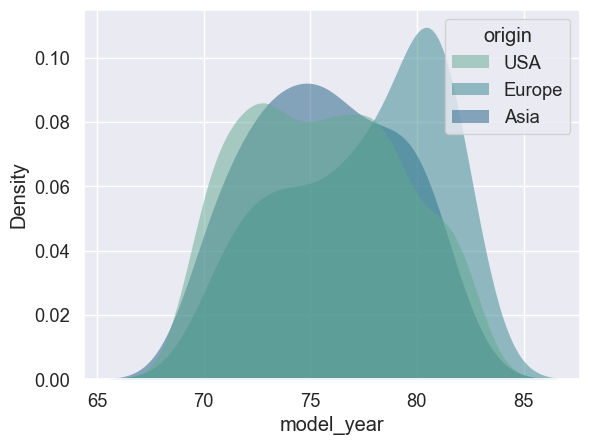

In [58]:
sns.kdeplot(
    data=auto_mpg, x='model_year', hue='origin',
    fill=True, common_norm=False, palette='crest',
    alpha= .5, linewidth=0,
)

In [59]:
from statistics import correlation

correlations = auto_mpg.corr()
correlations

C:\Users\garci\AppData\Local\Temp\ipykernel_49876\1509485354.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = auto_mpg.corr()


,mpg,cylinders,displacements,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacements,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


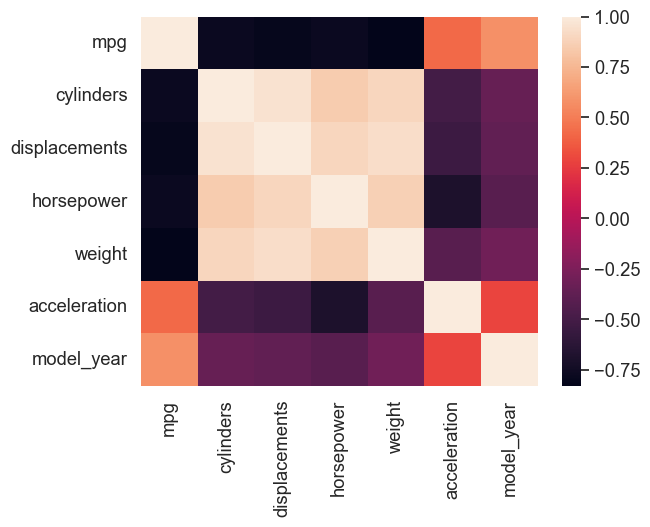

In [60]:
sns.heatmap(correlations)
plt.show()

1) Relationship between weight and horsepower 

2) Relationship between horsepower and weight

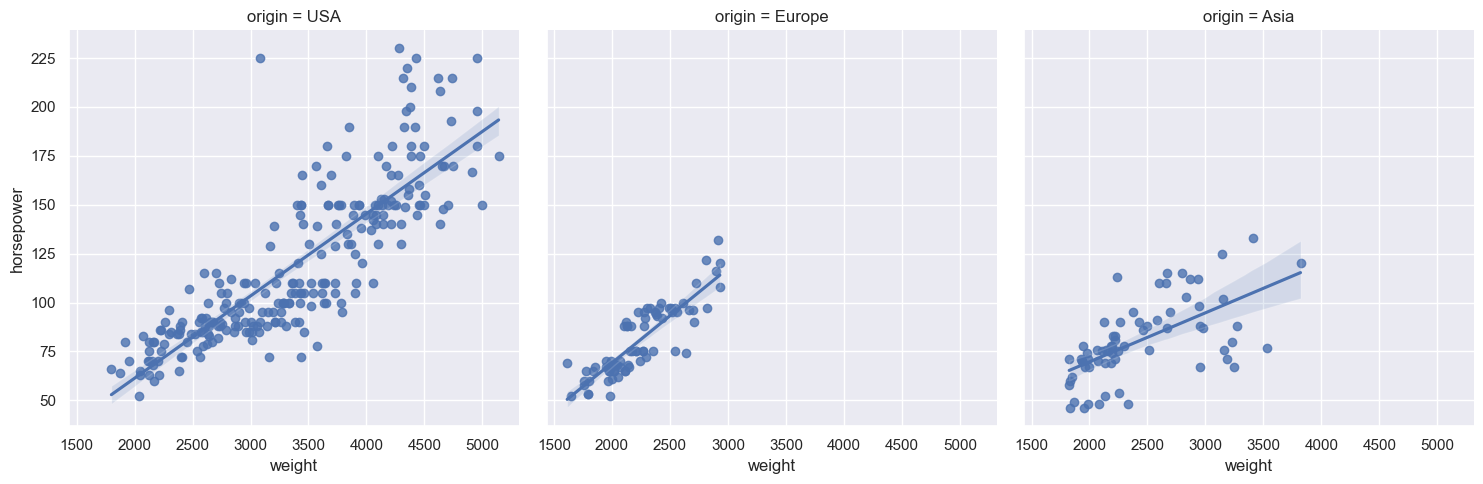

In [61]:
from tkinter import font


sns.set(font_scale = 1)
horsepower = sns.lmplot(x='weight', y='horsepower', col='origin', data=auto_mpg)

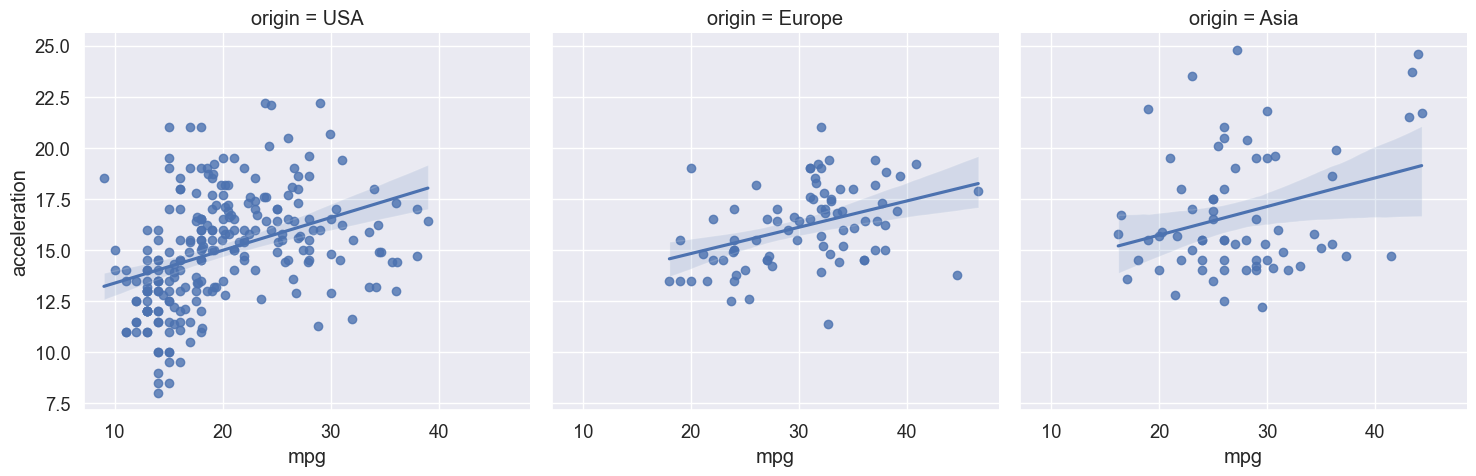

In [62]:
sns.set(font_scale = 1.2)
horsepower = sns.lmplot(x='mpg', y='acceleration', col='origin', data=auto_mpg)

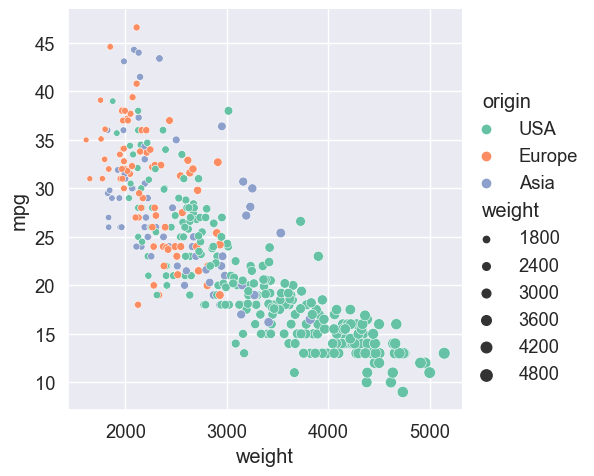

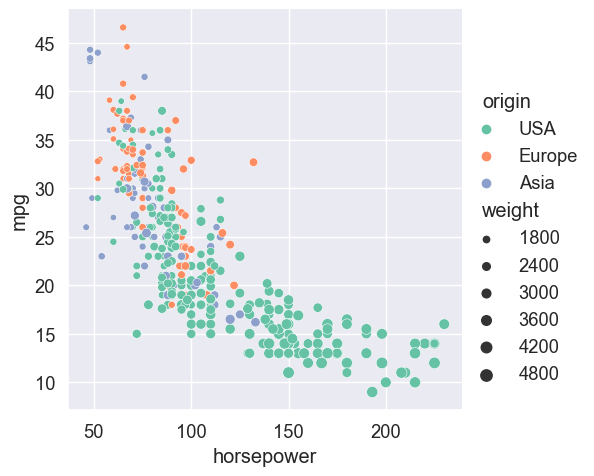

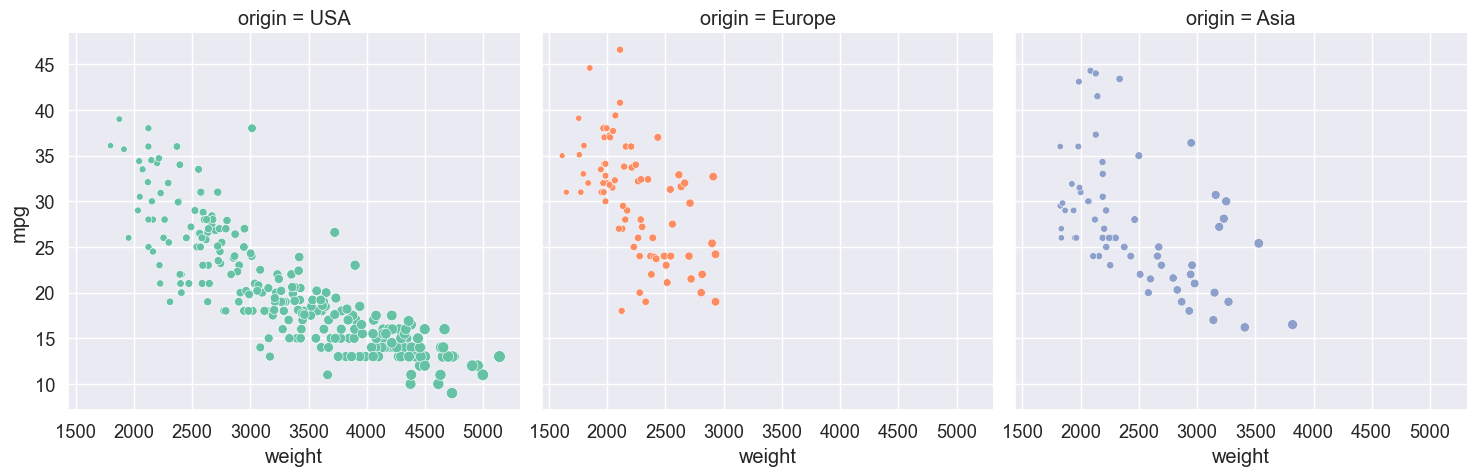

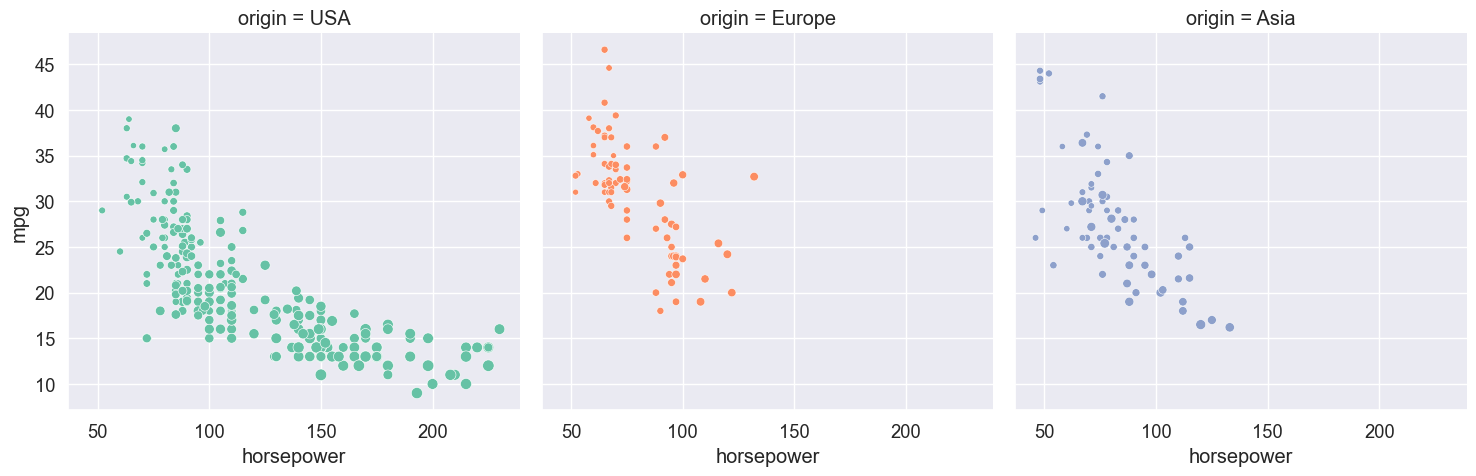

In [63]:
mpg_year = sns.relplot(x="weight", y="mpg", hue="origin", size='weight', data=auto_mpg, palette="Set2")
mpg_hp = sns.relplot(x="horsepower", y="mpg", hue="origin", size='weight', data=auto_mpg, palette="Set2")
mpgyear = sns.relplot(x="weight", y="mpg", col='origin', hue="origin", size='weight', data=auto_mpg, palette="Set2", legend=False)
mpgyear = sns.relplot(x="horsepower", y="mpg", col='origin', hue="origin", size='weight', data=auto_mpg, palette="Set2", legend=False)